In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [2]:
# Seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Path to the .npz file
DATASET_PATH = "../MLPC2025_classification"

ANNOTATIONS_PATH = DATASET_PATH + "/annotations.csv"
#ANNOTATIONS_TEXT_EMBEDDINGS_PATH = DATASET_PATH + "/annotations_text_embeddings.npz"

METADATA_PATH = DATASET_PATH + "/metadata.csv"
#METADATA_TITLE_EMBEDDINGS_PATH = DATASET_PATH + "/metadata_title_embeddings.npz"
#METADATA_KEYWORDS_EMBEDDINGS_PATH = DATASET_PATH + "/metadata_keywords_embeddings.npz"

AUDIO_PATHS = DATASET_PATH + "/audio"
AUDIO_FEATURES_PATHS = DATASET_PATH + "/audio_features"

LABELS_PATH = DATASET_PATH + "/labels"

In [3]:
annotations = pd.read_csv(ANNOTATIONS_PATH)
# annotations.head()
len(annotations)

27552

In [4]:
# Remove unnecessary columns for this task
annotations = annotations.drop(columns=['task_id'])
annotations['original_index'] = annotations.index
annotations.head()

,filename,annotator,text,onset,offset,time,original_caption,categories,original_index
0,117126.mp3,1145579747015607221221744067969991550764671773...,An alarm is ringing loudly and repeatedly nearby.,0.000000,10.503064,345.033,Raw loud alarm sound repeatedly ringing nearby,['Alarm'],0
1,117126.mp3,1145579747015607221221744067969991550764671773...,An alarm is ringing repeatedly nearby.,12.514616,23.048000,345.033,Clean alarm sound repeatedly ringing nearby,['Alarm'],1
2,118234.mp3,5022633589939139634134314703519782680423201448...,An alarm clock is beeping continuously.,0.000000,13.414880,919.016,Alarm clock beeping continuesly,"['Alarm', 'Beep/Bleep']",2
3,118234.mp3,5022633589939139634134314703519782680423201448...,An alarm clock is beeping continuously.,15.134252,28.492000,919.016,Alarm clock beeping continuesly,"['Alarm', 'Beep/Bleep']",3
4,119173.mp3,8105077500224920444298835829881210427871190692...,A car alarm sounds loudly in a steady pattern.,0.000000,20.065604,2162.620,a car alarm sounds loudly in a steady pattern ...,"['Alarm', 'Car']",4


In [5]:
len(annotations)


27552

In [5]:
metadata = pd.read_csv(METADATA_PATH)
len(metadata)
# metadata.head()

8230

In [6]:
# Remove unnecessary columns for this task
metadata = metadata.drop(columns=['freesound_id', 'sound_link', 'manufacturer', 'license', 'num_downloads', 'geotag', 'start_time_s', 'end_time_s'])
# metadata.head()

In [7]:
# Load audio features
all_audio_file_basenames = [os.path.splitext(os.path.basename(name))[0] for name in os.listdir(AUDIO_PATHS) if name.endswith('.mp3')]
all_audio_file_features = {}
for audio_file_basename in tqdm(all_audio_file_basenames):
    features_path = os.path.join(AUDIO_FEATURES_PATHS, audio_file_basename + '.npz')
    features = dict(np.load(features_path))
    all_audio_file_features[audio_file_basename] = features

len(all_audio_file_basenames)

100%|██████████| 8230/8230 [01:18<00:00, 105.40it/s]


8230

In [8]:
# Load audio labels
all_audio_file_basenames = [os.path.splitext(os.path.basename(name))[0] for name in os.listdir(AUDIO_PATHS) if name.endswith('.mp3')]
all_audio_file_labels = {}
for audio_file_basename in tqdm(all_audio_file_basenames):
    labels_path = os.path.join(LABELS_PATH, audio_file_basename + '_labels.npz')
    labels = dict(np.load(labels_path))
    all_audio_file_labels[audio_file_basename] = labels
len(all_audio_file_labels)

100%|██████████| 8230/8230 [02:27<00:00, 55.95it/s]


8230

In [9]:
example_audio_file = all_audio_file_basenames[0]
example_audio_features = all_audio_file_features[example_audio_file]
example_audio_labels = all_audio_file_labels[example_audio_file]

all_audio_feature_names = list(example_audio_features.keys())
all_audio_label_names = list(example_audio_labels.keys())

print(f'All audio features: n={len(all_audio_feature_names)}')
print(f'\t{all_audio_feature_names}')

print(f'\nAll audio labels: n={len(all_audio_label_names)}')
print(f'\t{all_audio_label_names}')

All audio features: n=13
	['embeddings', 'melspectrogram', 'mfcc', 'mfcc_delta', 'mfcc_delta2', 'flatness', 'centroid', 'flux', 'energy', 'power', 'bandwidth', 'contrast', 'zerocrossingrate']

All audio labels: n=58
	['Airplane', 'Alarm', 'Beep/Bleep', 'Bell', 'Bicycle', 'Bird Chirp', 'Bus', 'Car', 'Cat Meow', 'Chainsaw', 'Clapping', 'Cough', 'Cow Moo', 'Cowbell', 'Crying', 'Dog Bark', 'Doorbell', 'Drip', 'Drums', 'Fire', 'Footsteps', 'Guitar', 'Hammer', 'Helicopter', 'Hiccup', 'Horn Honk', 'Horse Neigh', 'Insect Buzz', 'Jackhammer', 'Laughter', 'Lawn Mower', 'Motorcycle', 'Piano', 'Pig Oink', 'Power Drill', 'Power Saw', 'Rain', 'Rooster Crow', 'Saxophone', 'Sewing Machine', 'Sheep/Goat Bleat', 'Ship/Boat', 'Shout', 'Singing', 'Siren', 'Sneeze', 'Snoring', 'Speech', 'Stream/River', 'Thunder', 'Train', 'Truck', 'Trumpet', 'Vacuum Cleaner', 'Violin', 'Washing Machine', 'Waves', 'Wind']


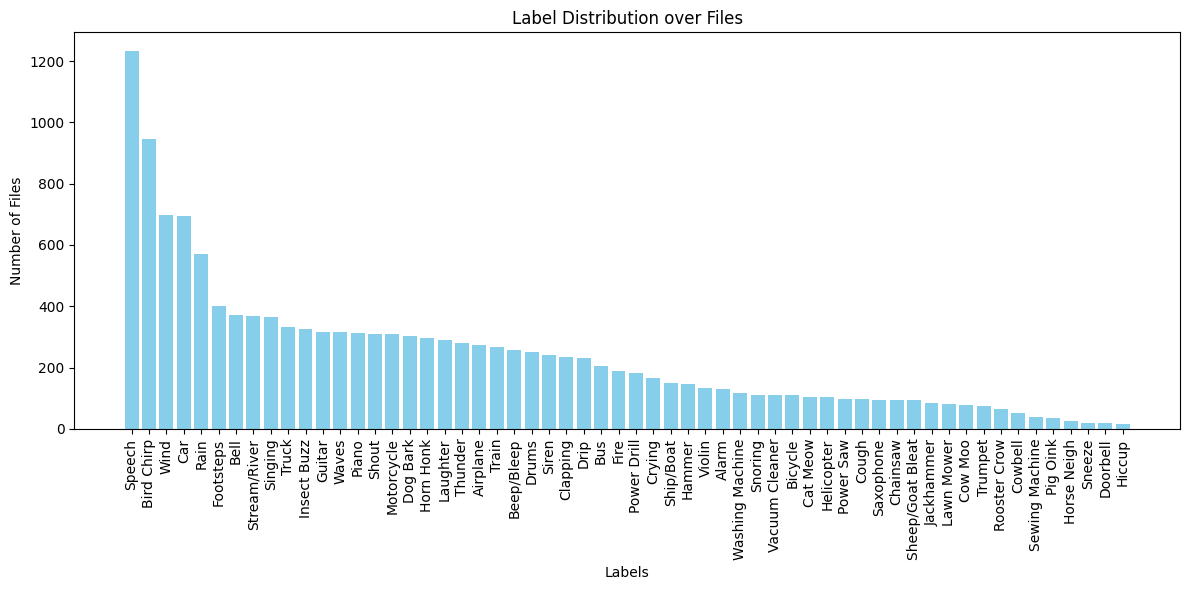

In [10]:
# Check label distribution
files_per_label = {label_name: 0 for label_name in all_audio_label_names}
for audio_file_basename in all_audio_file_basenames:
    for label_name, label_values in all_audio_file_labels[audio_file_basename].items():
        if np.sum(label_values) > 0:
            files_per_label[label_name] += 1

label_counts = sorted(list(files_per_label.items()), key=lambda x: x[1], reverse=True)

labels = [label for label, count in label_counts]
counts = [count for label, count in label_counts]

plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Files')
plt.title('Label Distribution over Files')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
print(f'\nAll audio labels: n={len(all_audio_label_names)}')
print(f'\t{all_audio_label_names}')


All audio labels: n=58
	['Airplane', 'Alarm', 'Beep/Bleep', 'Bell', 'Bicycle', 'Bird Chirp', 'Bus', 'Car', 'Cat Meow', 'Chainsaw', 'Clapping', 'Cough', 'Cow Moo', 'Cowbell', 'Crying', 'Dog Bark', 'Doorbell', 'Drip', 'Drums', 'Fire', 'Footsteps', 'Guitar', 'Hammer', 'Helicopter', 'Hiccup', 'Horn Honk', 'Horse Neigh', 'Insect Buzz', 'Jackhammer', 'Laughter', 'Lawn Mower', 'Motorcycle', 'Piano', 'Pig Oink', 'Power Drill', 'Power Saw', 'Rain', 'Rooster Crow', 'Saxophone', 'Sewing Machine', 'Sheep/Goat Bleat', 'Ship/Boat', 'Shout', 'Singing', 'Siren', 'Sneeze', 'Snoring', 'Speech', 'Stream/River', 'Thunder', 'Train', 'Truck', 'Trumpet', 'Vacuum Cleaner', 'Violin', 'Washing Machine', 'Waves', 'Wind']


In [16]:
from collections import Counter

target_labels =  ['Airplane', 'Alarm', 'Beep/Bleep', 'Bell', 'Bicycle', 'Bird Chirp', 'Bus', 'Car', 'Cat Meow', 'Chainsaw', 'Clapping', 'Cough', 'Cow Moo', 'Cowbell', 'Crying', 'Dog Bark', 'Doorbell', 'Drip', 'Drums', 'Fire', 'Footsteps', 'Guitar', 'Hammer', 'Helicopter', 'Hiccup', 'Horn Honk', 'Horse Neigh', 'Insect Buzz', 'Jackhammer', 'Laughter', 'Lawn Mower', 'Motorcycle', 'Piano', 'Pig Oink', 'Power Drill', 'Power Saw', 'Rain', 'Rooster Crow', 'Saxophone', 'Sewing Machine', 'Sheep/Goat Bleat', 'Ship/Boat', 'Shout', 'Singing', 'Siren', 'Sneeze', 'Snoring', 'Speech', 'Stream/River', 'Thunder', 'Train', 'Truck', 'Trumpet', 'Vacuum Cleaner', 'Violin', 'Washing Machine', 'Waves', 'Wind']
excluded_words = {"in", "of", "the", "a", "an", "from", "and", "is", "with", "as", "by", "is", 'are'}
n_displayed = 12


counters = {}
i = 0

for idx, row in annotations.iterrows():
    i+=1
    label = row["categories"]

    words = row["text"].lower().split()

    filtered_words = [w.strip(",.") for w in words if w not in excluded_words]

    labels = label.strip("[]").replace("'","").split(", ")

    for l in labels:
        if not l in counters:
            counters[l] = Counter(filtered_words)
        else:
            counters[l].update(filtered_words)
print(i)
for c in counters:
    print(c,':')
    print(counters[c].most_common(n_displayed))
    print('\n')

27552
Alarm :
[('alarm', 359), ('beeps', 110), ('clock', 78), ('loudly', 62), ('repeatedly', 54), ('sounds', 52), ('high-pitched', 51), ('short', 44), ('fire', 38), ('metallic', 37), ('loud', 37), ('rings', 36)]


Beep/Bleep :
[('beep', 251), ('beeps', 231), ('beeping', 193), ('sound', 167), ('electronic', 143), ('high-pitched', 128), ('alarm', 123), ('sounds', 105), ('short', 89), ('repeatedly', 74), ('tone', 65), ('loudly', 54)]


Car :
[('car', 741), ('engine', 333), ('on', 197), ('cars', 195), ('driving', 179), ('distance', 143), ('traffic', 142), ('sound', 126), ('by', 122), ('passes', 120), ('noise', 112), ('sounds', 108)]


Speech :
[('speaking', 1166), ('people', 733), ('man', 608), ('talking', 602), ('background', 457), ('voice', 328), ('woman', 319), ('speaks', 249), ('distance', 237), ('loudly', 201), ('muffled', 188), ('someone', 157)]


Hammer :
[('hammer', 259), ('hammering', 147), ('metallic', 98), ('strikes', 87), ('construction', 85), ('nail', 76), ('wood', 71), ('repe